# Data Science in Practice 2019, Problem set 1: Descriptive Report

### **Students:** Augustin Fontugne, Kilian Girardet, Paul Mermod, Thevie Mortiniera, Mathieu Shiva

In this notebook, we will try to provide a descriptive report on the customers of Telco using the Telco-Customer-Churn.csv dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
customers_df = pd.read_csv('Telco-Customer-Churn.csv')
nb_customers = len(customers_df.index)
print('There are a total of %s customers in the dataset.' %(nb_customers))

There are a total of 7043 customers in the dataset.


In [3]:
#Taking a quick look at the different type of features provided for each customer.
customers_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
#Taking a quick look at the data.
pd.set_option('display.max_columns', None)
customers_df.head(12)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


We can see on the table above that (ignoring the customerID) we only have 3 numerical features (Tenure, MonthlyCharges and TotalCharges). All the other features are categorical.

In [5]:
#We replace the Yes, No categorical features by 1 and 0 in order to facilitate further binary analysis.
customers_df = customers_df.replace({'Yes': 1,'No': 0,'No internet service': 0,'No phone service': 0}, regex=True)
#customers_df  #remove the first '#' to vizualize the modified dataframe

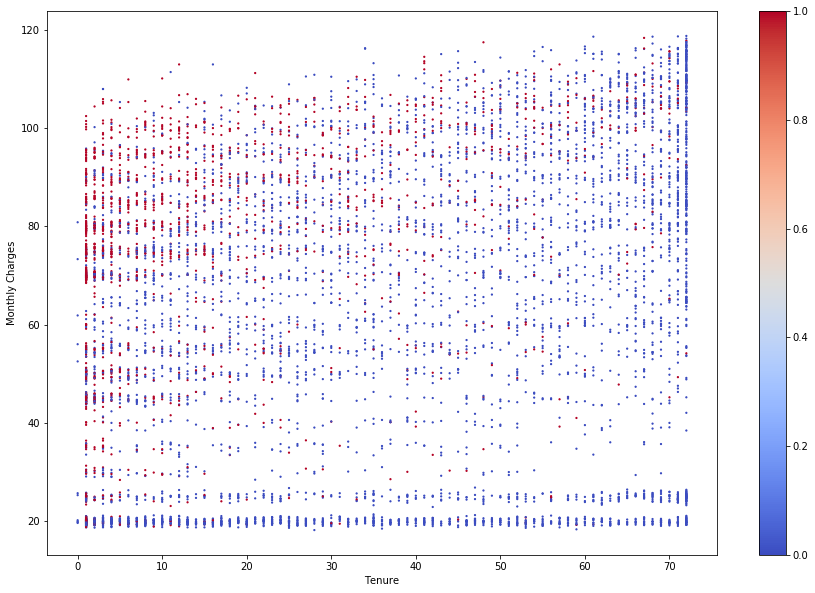

In [6]:
plt.figure(figsize=(15, 10))
plt.scatter(customers_df["tenure"].values, customers_df["MonthlyCharges"].values, s=1.5, c=customers_df["Churn"].values, cmap='coolwarm')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.colorbar();

We can see on the plot above that most of the people who churn (represented by red points), are mostly in the upper left corner of the graph => People who tend to churn early have high monthly charges. Whereas the people who have low monthly charges, hardly ever churn.

In [16]:
#Taking only the loyal customers
df = customers_df[customers_df["Churn"] == 0]